# Start Skin Dataset

In [14]:
# Read in credit dataset and assign letter names to the columns; the data is completely anonymized.
import numpy as np
import pandas as pd
import string

bank = pd.read_csv("studentInfo.csv", sep=",")
#alpha = list(string.ascii_uppercase)
#skin.columns = alpha[:len(skin.columns)]
print(bank.columns, bank.shape)

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object') (32593, 12)


In [3]:
print(bank.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(bank['final_result'])
bank['y'] = le.transform(bank['final_result'])
bank.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,y
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,2
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,2
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,3
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2


In [26]:
bank = pd.get_dummies(bank)
bank.head()


,id_student,num_of_prev_attempts,studied_credits,y,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,...,imd_band_?,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,11391,0,240,2,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,28400,0,60,2,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,30268,0,60,3,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,31604,0,60,2,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,32885,0,60,2,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [44]:
import pandas_profiling as pdpro
pdpro.ProfileReport(bank)

Number of variables,64
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,5.5 MiB
Average record size in memory,141.0 B
Numeric,8
Categorical,0
Boolean,53
Date,0
Text (Unique),0
Rejected,3


In [4]:
# credit.replace({'?' : np.nan}, inplace=True)
# credit.dropna(subset=['B','O','N'], inplace=True)
# credit.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
%matplotlib inline
import seaborn as sns
sns.set(style = "ticks")

sns.pairplot(bank, hue="y")


KeyboardInterrupt: 

In [9]:
# %matplotlib inline
# pd.plotting.scatter_matrix(credit)
# plt.show()

In [27]:
data = bank.sample(n=10000)
print(data.shape)

(10000, 55)


In [29]:
y = np.ravel(bank['code_module_AAA'].values)
X = bank.drop(['y'], axis=1)
#X = credit.values[:,0:credit.shape[1]-1]
print(y.shape, X.shape)
print(X,y)

(32593,) (32593, 54)
       id_student  num_of_prev_attempts  studied_credits  code_module_AAA  \
0           11391                     0              240                1   
1           28400                     0               60                1   
2           30268                     0               60                1   
3           31604                     0               60                1   
4           32885                     0               60                1   
5           38053                     0               60                1   
6           45462                     0               60                1   
7           45642                     0              120                1   
8           52130                     0               90                1   
9           53025                     0               60                1   
10          57506                     0               60                1   
11          58873                     0               6

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.025, train_size=.05,
                                                    #random_state=1234,
                                                    stratify=y)

# kNN

In [52]:
#Setup classifiers and pipelines

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier().fit(X_train, y_train)
pipe_knn = Pipeline([('sclr', MinMaxScaler()),
                      ('clf', knn)])
pipe_knn.fit(X_train, y_train)
print('Raw KNN Test Accuracy (by CV): %f' % pipe_knn.score(X_test, y_test))


# Run GridsearchCV
from sklearn.model_selection import GridSearchCV
n_neighbors = [1, 5, 10, 15, 20, 30]
p = [1,2,3]
#param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__n_neighbors': n_neighbors,
              'clf__p': p}]

gs = GridSearchCV(estimator=pipe_knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1)
gs = gs.fit(X_train, y_train)
#print(gs.best_score_)
#print(gs.best_params_)

best_knn = gs.best_estimator_
best_knn.fit(X_train,y_train)
print('Test KNN Accuracy (by GS CV): %.3f' % best_knn.score(X_test, y_test))

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier('most_frequent')
dummy.fit(X_train, y_train)
print("Dummy Prediction accuracy: %f"
      % dummy.score(X_test, y_test))



Raw KNN Test Accuracy (by CV): 0.885437
Test KNN Accuracy (by GS CV): 0.890
Dummy Prediction accuracy: 0.887379


In [16]:
print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))

Best GS Params:  {'clf__n_neighbors': 30, 'clf__p': 2}
Best Score in CV: 0.897656913925
Mean Score CV: 0.890143390933


In [50]:
from sklearn.model_selection import cross_val_score
print('Raw CV Accuracy: %f' % np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

Raw CV Accuracy: 0.907262


# LinearSVC

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

lin_svc = LinearSVC()

pipe_lin_svc = Pipeline([('sclr', MinMaxScaler()),
                      ('clf', lin_svc)])
pipe_lin_svc.fit(X_train, y_train)
print('Raw LinearSVC Test Accuracy (by CV): %f' % pipe_lin_svc.score(X_test, y_test))
#print(lin_svc.coef_, lin_svc.intercept_)



#Run GridsearchCV
from sklearn.model_selection import GridSearchCV
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 6.0, 10.0, 100.0]
max_iter_range = [500,1000,1500,2000]
#param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': C_range,
              'clf__dual': [True, False],
              'clf__max_iter' : max_iter_range}]

gs = GridSearchCV(estimator=pipe_lin_svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1)
gs = gs.fit(X_train, y_train).
#print(gs.best_score_)
#print(gs.best_params_)

best_lin_svc = gs.best_estimator_
best_lin_svc.fit(X_train,y_train)
print('Test Lin_SVC Accuracy (by GS CV): %.3f' % best_lin_svc.score(X_test, y_test))

Raw LinearSVC Test Accuracy (by CV): 0.912621
Test Lin_SVC Accuracy (by GS CV): 0.913


In [17]:
print("Best GS Params: ", gs.best_params_).90
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))

Best GS Params:  {'clf__n_neighbors': 30, 'clf__p': 2}
Best Score in CV: 0.897656913925
Mean Score CV: 0.890143390933


In [54]:
from sklearn.model_selection import cross_val_score
print('Raw CV Accuracy: %f' % np.mean(cross_val_score(lin_svc, X_train, y_train, cv=10)))
print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))

Raw CV Accuracy: 0.734413
Best GS Params:  {'clf__C': 10.0, 'clf__dual': True, 'clf__max_iter': 500}
Best Score in CV: 0.905779504614
Mean Score CV: 0.897900814851


## Polynomial SVC

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svc = SVC()
#print(svc)
pipe_svc = Pipeline([('sclr', MinMaxScaler()),
                      ('clf', svc)])
pipe_svc.fit(X_train, y_train)
print('Raw SVC Test Accuracy (by CV): %f' % pipe_svc.score(X_test, y_test))
#print(lin_svc.coef_, lin_svc.intercept_)



#Run GridsearchCV
from sklearn.model_selection import GridSearchCV
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 5.0]
max_iter_range = [500,1000,1500,2000]
degree_range = [2,3,4,5]

param_grid = [{'clf__C': C_range,
              'clf__degree': degree_range,
              'clf__max_iter' : max_iter_range}]

gs = GridSearchCV(estimator=pipe_svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    refit=True)
gs = gs.fit(X_train, y_train)
best_svc = gs.best_estimator_
#print(gs.best_score_)
#print(gs.best_params_)

best_svc = gs.best_estimator_

print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))
print('Test SVC Accuracy (by GS CV): %.3f' % best_svc.score(X_test, y_test))

Raw SVC Test Accuracy (by CV): 0.887379
Best GS Params:  {'clf__C': 5.0, 'clf__degree': 2, 'clf__max_iter': 1000}
Best Score in CV: 0.891694997572
Mean Score CV: 0.888243252619
Test SVC Accuracy (by GS CV): 0.906


C:\Users\Russ\Anaconda2\envs\datasci\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [56]:
from sklearn.model_selection import cross_val_score
print('Raw CV Accuracy: %f' % np.mean(cross_val_score(lin_svc, X_train, y_train, cv=10)))
print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))

Raw CV Accuracy: 0.819768
Best GS Params:  {'clf__C': 5.0, 'clf__degree': 2, 'clf__max_iter': 1000}
Best Score in CV: 0.891694997572
Mean Score CV: 0.888243252619


# Decision Trees

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
#import graphviz
from copy import deepcopy
from sklearn.model_selection import cross_val_score, cross_val_predict
#print('Raw DT CV Accuracy: %f' % np.mean(cross_val_score(dt, X_train, y_train, cv=10)))
# Decision Tree
dt = DecisionTreeClassifier()
pipe_dt = Pipeline([('clf', dt)])
pipe_dt.fit(X_train, y_train)
print('Raw DT Test Accuracy: %f' % pipe_dt.score(X_test, y_test))
predicts = cross_val_predict(dt, X_train, y_train, cv=10)
print('Raw DT CV Accuracy: %f' % np.mean(cross_val_score(dt, X_train, y_train, cv=10)))
#print(lin_svc.coef_, lin_svc.intercept_)
#print(pipe_dt.steps[0][1])
#export_graphviz(pipe_dt.steps[0][1], out_file="tree.dot")

# #Run GridsearchCV
from sklearn.model_selection import GridSearchCV
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth_range = [3, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100,200,300]
min_samples_split = [2, 3, 5, 10]



param_grid = [{'clf__criterion': criterion,
              'clf__splitter': splitter,
              'clf__max_depth' : max_depth_range,
              'clf__min_samples_split': min_samples_split}]

gs = GridSearchCV(estimator=pipe_dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    refit=True)
gs = gs.fit(X_train, y_train)
best_tree = gs.best_estimator_
print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))

print('Test DT Accuracy (by GS CV): %.3f' % gs.score(X_test, y_test))


Raw DT Test Accuracy: 1.000000
Raw DT CV Accuracy: 1.000000
Best GS Params:  {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2, 'clf__splitter': 'best'}
Best Score in CV: 1.0
Mean Score CV: 1.0
Test DT Accuracy (by GS CV): 1.000


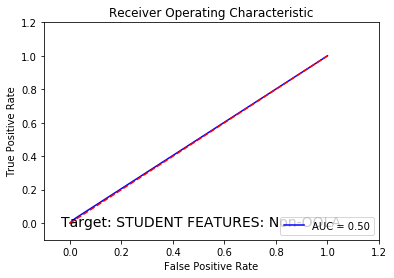

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

actual = bank['code_module_AAA'].values
actual = actual[:1629]


false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicts)
roc_auc = auc(false_positive_rate, true_positive_rate)




# Add OOLA text
ax = plt.gca()
textstr="Target: STUDENT FEATURES: Non-OOLA"

ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=14,
verticalalignment='bottom')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AdaBoost (Trees)

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
import graphviz
from copy import deepcopy

# Decision Tree
dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier()
pipe_ada = Pipeline([('clf', dtc)])
pipe_ada.fit(X_train, y_train)
print('Raw AdaDT Test Accuracy (by CV): %f' % pipe_ada.score(X_test, y_test))

# #Run GridsearchCV
from sklearn.model_selection import GridSearchCV
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth_range = [3,4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100,200,300]
min_samples_split = [2, 3, 5, 10]



param_grid = [{'clf__criterion': criterion,
              'clf__splitter': splitter,
              'clf__max_depth' : max_depth_range,
              'clf__min_samples_split': min_samples_split}]

gs = GridSearchCV(estimator=pipe_ada,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    refit=True)
gs = gs.fit(X_train, y_train)
best_estim = gs.best_estimator_
print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))

print('Test AdaDT Accuracy (by GS CV): %.3f' % gs.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
print('Raw DT CV Accuracy: %f' % np.mean(cross_val_score(dt, X_train, y_train, cv=10)))


Raw AdaDT Test Accuracy (by CV): 0.900000
Best GS Params:  {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_split': 2, 'clf__splitter': 'best'}
Best Score in CV: 0.916949975716
Mean Score CV: 0.897441491622
Test AdaDT Accuracy (by GS CV): 0.918
Raw DT CV Accuracy: 0.895569


In [130]:
# import graphviz
# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

## Neural Network (MultiLayerPerceptron)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
print('Raw DT CV Accuracy: %f' % np.mean(cross_val_score(dt, X_train, y_train, cv=10)))

# Decision Tree
mlp = MLPClassifier(max_iter=1000)
pipe_mlp = Pipeline([('sclr', StandardScaler()),
                    ('clf', mlp)])
pipe_mlp.fit(X_train, y_train)
print('Raw MLP Test Accuracy (by CV): %f' % pipe_mlp.score(X_test, y_test))

# #Run GridsearchCV
from sklearn.model_selection import GridSearchCV

learning_rate = ["constant", "adaptive"]
alpha = 10.0 ** -np.arange(1, 7)
solver = ['sgd', 'adam']#'lbfgs']
activation = ['relu', 'tanh', 'logistic']




param_grid = [{'clf__alpha': alpha,
              'clf__solver': solver,
              'clf__activation' : activation,
              'clf__learning_rate': learning_rate}]

gs = GridSearchCV(estimator=pipe_mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    refit=True)
gs = gs.fit(X_train, y_train)
best_estim = gs.best_estimator_
print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))

print('Test MLP Accuracy (by GS CV): %.3f' % gs.score(X_test, y_test))

Raw MLP Test Accuracy (by CV): 0.891262


In [ ]:
#print(pd.DataFrame(gs.cv_results_))
print(X.shape, y.shape)

In [43]:
print("Best GS Params: ", gs.best_params_)
print("Best Score in CV:", gs.best_score_)
print("Mean Score CV:", np.mean(gs.cv_results_['mean_test_score']))
print("Mean Fit Time:", np.mean(gs.cv_results_['mean_fit_time']))

Best GS Params:  {'clf__activation': 'tanh', 'clf__alpha': 0.10000000000000001, 'clf__learning_rate': 'constant', 'clf__solver': 'sgd'}
Best Score in CV: 0.912821758135
Mean Score CV: 0.906369731801
Mean Fit Time: 39.9279194653


In [35]:
print(gs.cv_results_)

{'mean_fit_time': array([ 56.01060562,  18.58884075,  61.11929867,  19.79730272,
        63.41923313,  22.62226682,  66.74751859,  24.80636177,
        68.15028617,  24.80730147,  69.30214217,  23.8537884 ,
        67.95973938,  25.75124869,  70.68797917,  24.37116327,
        66.17072163,  25.04779398,  69.05515525,  23.18150744,
        70.88818107,  25.2244045 ,  69.08591619,  24.46484528,
        26.03127961,  25.42347214,  30.53091445,  21.86600888,
        34.04241209,  27.57530646,  37.13311634,  25.03463976,
        37.31452854,  25.05114529,  33.82538822,  25.988415  ,
        39.26254296,  26.32302918,  40.17475414,  25.84871738,
        32.47072661,  28.66605585,  33.40531878,  30.30936604,
        33.52313497,  27.76857235,  38.23833196,  25.27597179,
        39.47245617,   5.61871679,  38.29969461,   7.8345726 ,
        37.39230471,  55.86795721,  40.64976614,  57.04105749,
        35.60804636,  63.39102356,  36.35770187,  63.14724052,
        36.50184183,  60.69085526,  4

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
def plot_validation_curve(classifier, model_name, param_name, param_range):
    from sklearn.model_selection import validation_curve
    train_scores, test_scores = validation_curve(
        classifier, X, y, param_name=param_name, param_range=param_range,
        cv=3, scoring="accuracy", n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve - " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide ` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

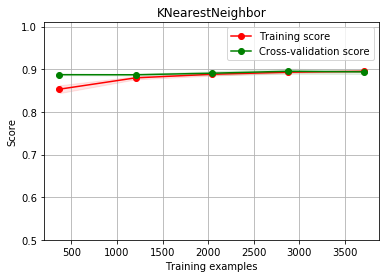

In [41]:
# Plot Learning Curve
%matplotlib inline
#cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1234)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(best_knn, 'KNearestNeighbor', X_train, y_train, (0.5, 1.01), cv=kfold, n_jobs=4)

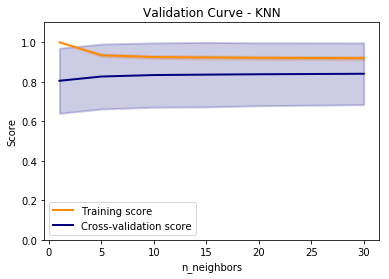

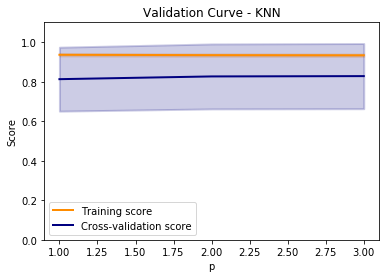

In [23]:
# Plot Validation Curves
%matplotlib inline
plot_validation_curve(knn, "KNN", "n_neighbors", n_neighbors)
plot_validation_curve(knn, "KNN", "p", p)

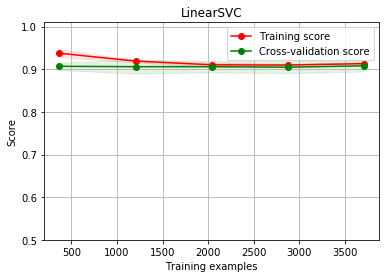

In [42]:
# Plot Learning Curve
%matplotlib inline
#cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1234)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(best_lin_svc, 'LinearSVC', X_train, y_train, (0.5, 1.01), cv=kfold, n_jobs=4)

In [ ]:
# Plot Validation Curves
%matplotlib inline
plot_validation_curve(best_lin_svc.steps[1][1], "LinearSVC", "C", C_range)
plot_validation_curve(best_lin_svc.steps[1][1], "LinearSVC", "dual", [True,False])
plot_validation_curve(best_lin_svc.steps[1][1], "LinearSVC", "max_iter", max_iter_range)

In [ ]:
# Plot Learning Curve
%matplotlib inline
#cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1234)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(best_svc, 'SVC', X_train, y_train, (0.4, 1.01), cv=kfold, n_jobs=-1)

In [ ]:
# Plot Validation Curves
%matplotlib inline
best_knn.get_params().keys()
plot_validation_curve(svc, "SVC", "C", C_range)
plot_validation_curve(svc, "SVC", "degree", degree_range)
plot_validation_curve(svc, "SVC", "max_iter", max_iter_range)

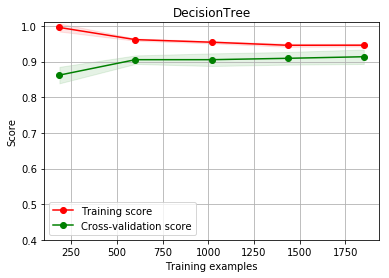

In [47]:
# Plot Learning Curve
%matplotlib inline
#cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1234)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(best_tree, 'DecisionTree', X_train, y_train, (0.4, 1.01), cv=kfold, n_jobs=-1)

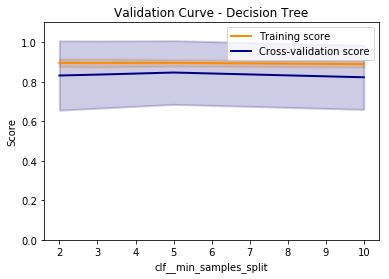

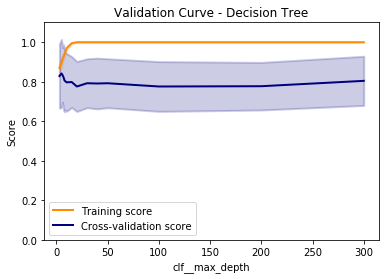

In [113]:
# Plot Validation Curves
%matplotlib inline
plot_validation_curve(best_tree, "Decision Tree", "clf__min_samples_split", min_samples_split)
plot_validation_curve(best_tree, "Decision Tree", "clf__max_depth", max_depth_range)

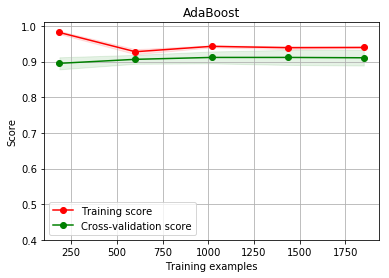

In [48]:
# Plot Learning Curve
%matplotlib inline
#cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1234)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(best_estim, 'AdaBoost', X_train, y_train, (0.4, 1.01), cv=kfold, n_jobs=-1)

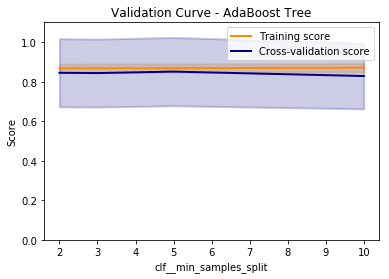

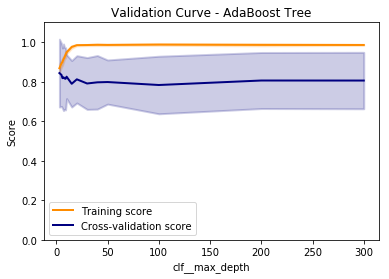

In [131]:
# Plot Validation Curves
%matplotlib inline
plot_validation_curve(best_estim, "AdaBoost Tree", "clf__min_samples_split", min_samples_split)
plot_validation_curve(best_estim, "AdaBoost Tree", "clf__max_depth", max_depth_range)

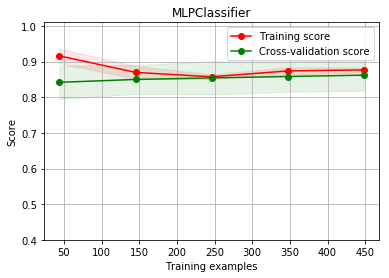

In [148]:
# Plot Learning Curve
%matplotlib inline
#cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1234)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(best_estim, 'MLPClassifier', X_train, y_train, (0.4, 1.01), cv=kfold, n_jobs=-1)

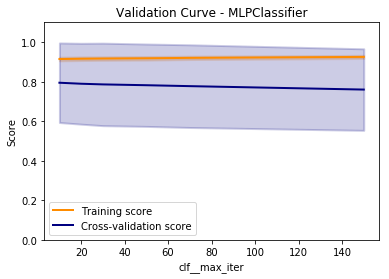

In [40]:
# Plot Validation Curves
%matplotlib inline
plot_validation_curve(best_estim, "MLPClassifier", "clf__max_iter", [10,20,30,50,70,150])
#plot_validation_curve(best_estim, "AdaBoost Tree", "clf__learning_rate", learning_rate)
#plot_validation_curve(best_estim, "AdaBoost Tree", "clf__", max_depth_range)
#plot_validation_curve(best_estim, "AdaBoost Tree", "clf__", max_depth_range)